In [ ]:
import cv2
import numpy as np

def extract_features(image):
    # Normalize the image
    normalized_image = image / 255.0

    # Apply Canny edge detection
    edges = cv2.Canny(np.uint8(normalized_image * 255), 100, 200)

    # Get coordinates of edge points
    feature_points = np.column_stack(np.where(edges > 0))

    return feature_points

This method detects the edges in the image by looking for areas where the brightness changes sharply. These edges are treated as important features or key points of the image.
After finding the edges, the coordinates of these edge points (where the edges exist) are extracted. These coordinates are basically the positions of the pixels that form edges.

In [1]:
def should_connect(feature1, feature2, max_distance=5):
    """ Check if two features are close enough to be connected. """
    distance = np.linalg.norm(feature1 - feature2)
    return distance <= max_distance

Creating a Graph:
A graph is created where each edge point (feature) from the image becomes a node in the graph.
The code then checks each pair of nodes to see if they should be connected by an edge. Two nodes are connected if they are close enough to each other, based on a predefined maximum distance. This proximity suggests that the features are part of the same or related objects in the image.

In [ ]:
import cv2
import numpy as np
import networkx as nx
from torchvision import datasets
def create_feature_graph(features):
    graph = nx.Graph()
    for feature in features:
        graph.add_node(tuple(feature))  # Add features as nodes

    # Add edges based on proximity of features
    for i, feature1 in enumerate(features):
        for feature2 in features[i+1:]:
            if should_connect(feature1, feature2):
                graph.add_edge(tuple(feature1), tuple(feature2))

    return graph


In [ ]:
# Function to visualize the graph
def visualize_graph(graph, title):
    pos = nx.spring_layout(graph)  # Positioning the nodes using spring layout
    nx.draw(graph, pos, with_labels=False, node_size=20)
    plt.title(title)


the graphs don't need to visually resemble the original digits. The purpose of the graph representation isn't to look like the original image, but to represent the spatial relationships and connections between important features within the image.

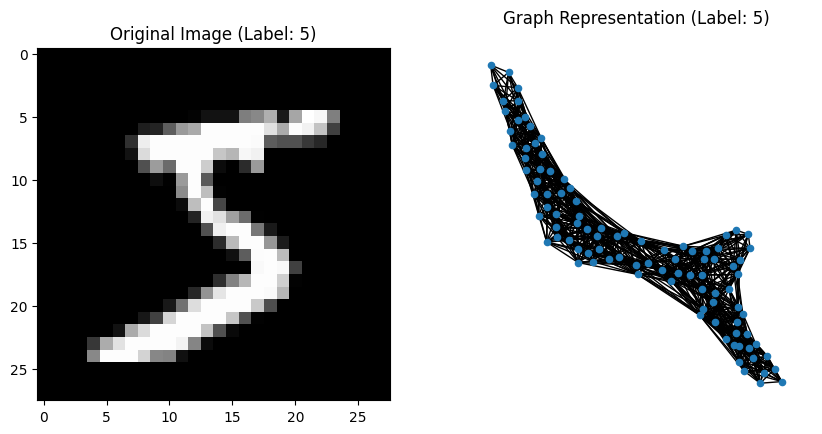

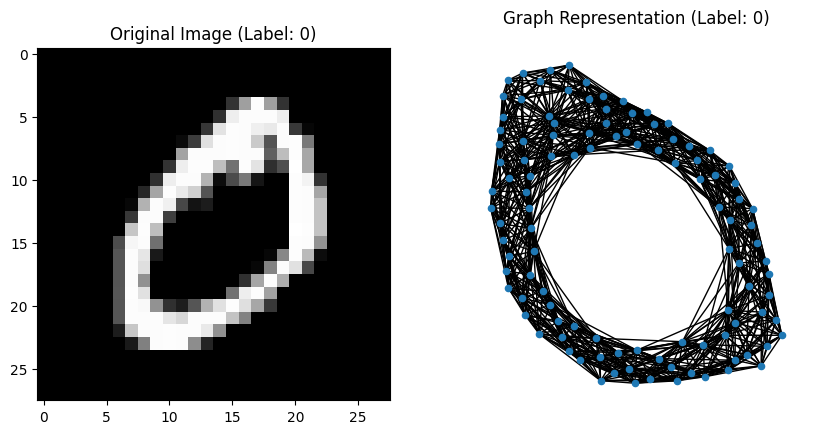

In [ ]:
import cv2
import numpy as np
import networkx as nx
from torchvision import datasets
import matplotlib.pyplot as plt
# Load MNIST dataset
mnist = datasets.MNIST(root='./data', train=True, download=True)
# Process just the first two images
for i, (image, label) in enumerate(mnist):
    if i >= 2:  # Limit to two images
        break
    image_array = np.array(image)
    features = extract_features(image_array)
    graph = create_feature_graph(features)

    # Visualize the original image and its graph representation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title(f"Original Image (Label: {label})")
    plt.subplot(1, 2, 2)
    visualize_graph(graph, f"Graph Representation (Label: {label})")
    plt.show()
